In [3]:
import pandas as pd
import numpy as np
# Load the data from both Excel files
crime_df = pd.read_excel('MPS Crime per Borough_Main.xlsx', sheet_name='Sheet1')
demographic_df = pd.read_excel('HPI and Demographic Data_backup.xlsx', sheet_name='Data')

# Rename columns for consistency
crime_df.rename(columns={'CITY': 'City'}, inplace=True)

# Display info about both dataframes
crime_df.info()
demographic_df.info()

# Display column names for both dataframes
crime_df.columns
demographic_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CRIME                                          955 non-null    object 
 1   City                                           955 non-null    object 
 2   2023                                           955 non-null    int64  
 3   Police Officer Strength (As at December 2023)  926 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   City                                                33 non-null     object 
 1   Average house price in GBP 

Index(['City', 'Average house price in GBP', 'Employment Rate (2023) %',
       'Unemployment Rate (2023) %', 'Qualifications (RQF) %',
       'No Qualifications %', 'Average Earnings per week %',
       'Population (Projection 2023)',
       'Population Density (per hectare - Projection 2023)'],
      dtype='object')

In [5]:
# Perform the join without unnamed columns
merged_df = crime_df.merge(demographic_df, on='City', how='inner')

# Display the head of the merged dataframe
merged_df.head()

# Display unique cities in the merged dataframe
print("Unique cities in the merged dataframe:")
print(merged_df['City'].unique())

Unique cities in the merged dataframe:
['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']


In [7]:
merged_df.head()

,CRIME,City,2023,Police Officer Strength (As at December 2023),Average house price in GBP,Employment Rate (2023) %,Unemployment Rate (2023) %,Qualifications (RQF) %,No Qualifications %,Average Earnings per week %,Population (Projection 2023),Population Density (per hectare - Projection 2023)
0,ARSON,Barking and Dagenham,44,1610.60411,349371,72.2,3.5,14.6,10.7,674.5,226988,62.9
1,CRIMINAL DAMAGE,Barking and Dagenham,1291,1610.60411,349371,72.2,3.5,14.6,10.7,674.5,226988,62.9
2,BURGLARY IN A RESIDENTIAL DWELLING,Barking and Dagenham,747,1610.60411,349371,72.2,3.5,14.6,10.7,674.5,226988,62.9
3,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,332,1610.60411,349371,72.2,3.5,14.6,10.7,674.5,226988,62.9
4,POSSESSION OF DRUGS,Barking and Dagenham,1069,1610.60411,349371,72.2,3.5,14.6,10.7,674.5,226988,62.9


In [9]:
merged_df.to_csv("new_data.csv",index=False)

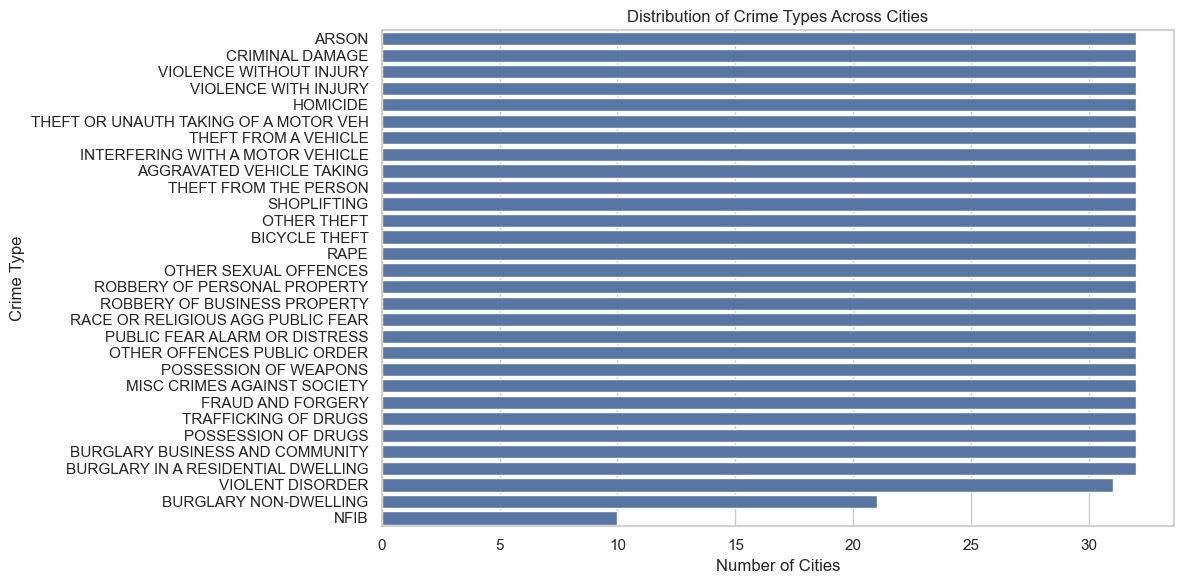

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the Excel file
df = pd.read_excel('new_data.xlsx', sheet_name='new_data')

# Set the style for the plots
sns.set(style='whitegrid')

# Plot 1: Distribution of Crime Types
plt.figure(figsize=(12, 6))
sns.countplot(y='CRIME', data=df, order=df['CRIME'].value_counts().index)
plt.title('Distribution of Crime Types Across Cities')
plt.xlabel('Number of Cities')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

This plot shows the representation of each crime type in the 32 cities on the dataset

From the plot, it can be deduced that with the exception of "Burglary non-dwelling" and "NFIB" that occur in 21 and 10 cities respectively, the rest of the crime types were present in all 32 cities

TOP 10 CITIES BY TOTAL CRIME

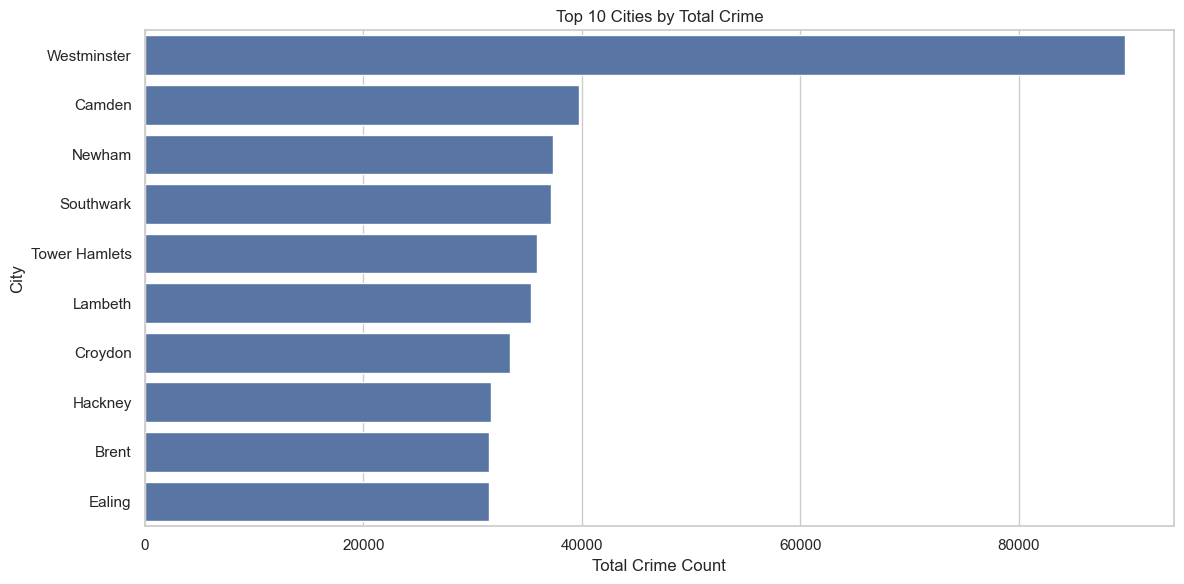

In [29]:
city_crime = df.groupby('City')[2023].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_crime.values, y=city_crime.index)
plt.title('Top 10 Cities by Total Crime')
plt.xlabel('Total Crime Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

The above plot show the total crimes committed per city irrespective of the crime type.

There's a significant disparity in crime rates between cities, with some experiencing much higher total crime counts than others.

The top cities (like Westminster and Camden) having higher crime rates might be as a result of being urban centers or tourist areas, which often have higher crime rates due to population density and more opportunities for certain types of crime

Though this assumption might be superficial, however, i said this as it was the only explanation to the high crime rate in the top 2 cities.

However. the article from Calling, L.C (2023) validates westminister as the borough in london with the highest tourists attraction. 

Secondly, Lisowska et al. (2017) opined that there is a clear association between tourism and crime rate.

Both articles lends credence to the above argument as to why westminster would have a high crime rate.

REFERENCE

Calling, L. C. (2023, June 18). A complete guide to the London neighbourhoods - London City Calling. London City Calling. https://www.londoncitycalling.com/london-neighbourhoods-area-guide/

Lisowska, A., University of Wroclaw, Institute of Geography and Regional Development, & Socio-Economic Geography Institution. (2017). CRIME IN TOURISM DESTINATIONS: RESEARCH REVIEW. In Tourism (pp. 1–32) [Journal-article]. https://doi.org/10.1515/tour-2017-0004

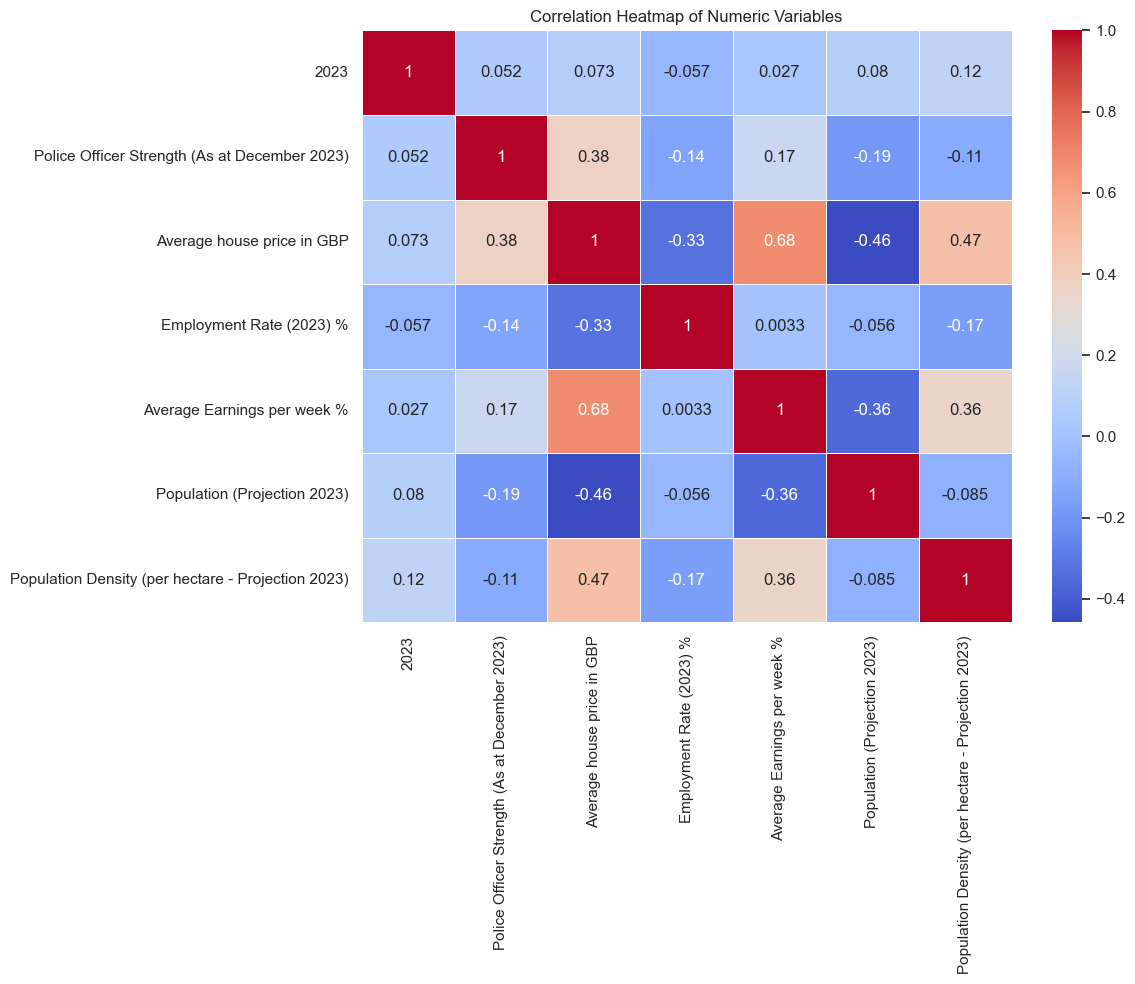

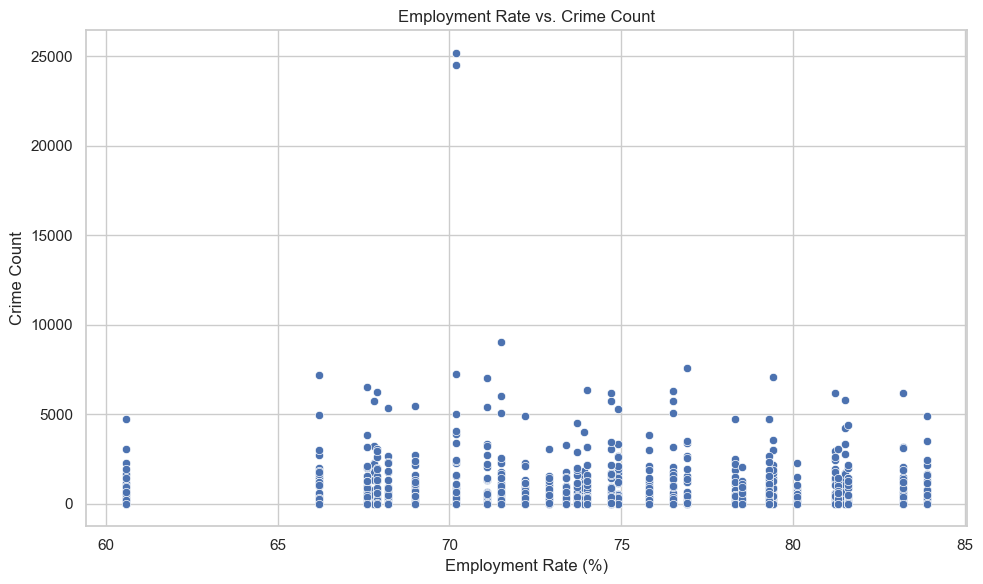

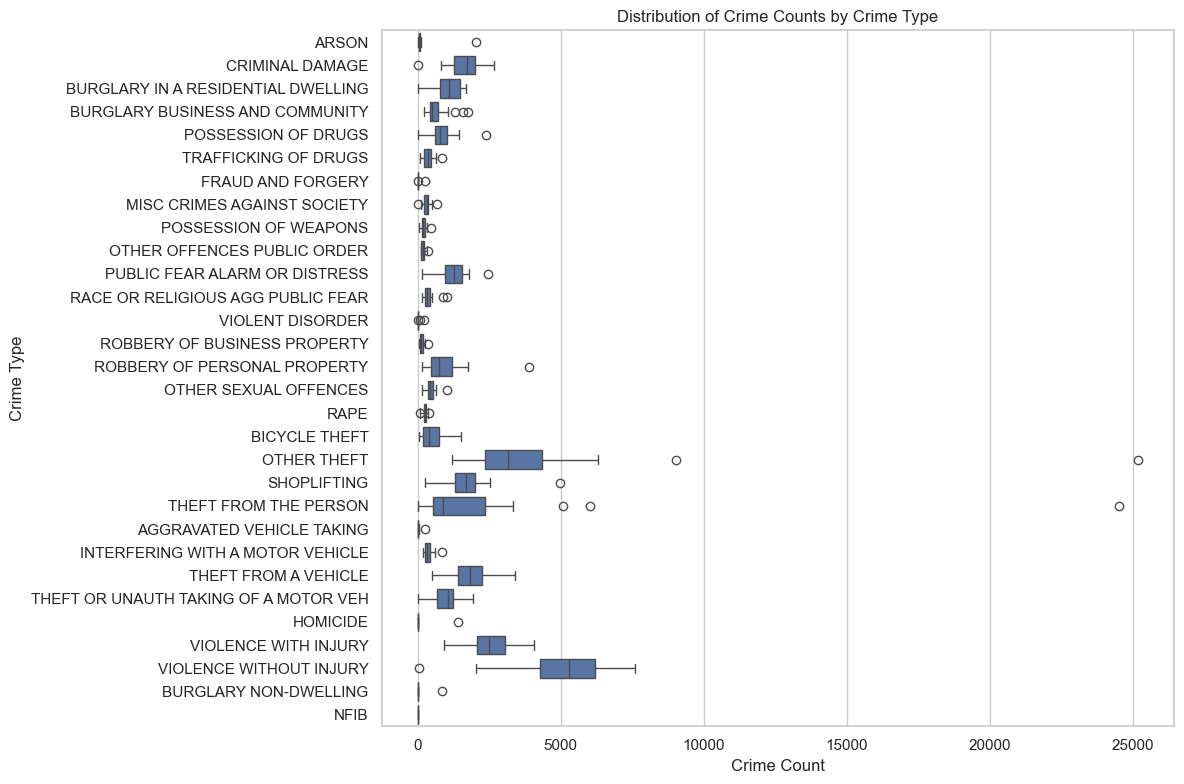

In [13]:
# Plot 3: Correlation Heatmap
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Plot 4: Scatter plot of Employment Rate vs. Crime Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employment Rate (2023) %', y=2023, data=df)
plt.title('Employment Rate vs. Crime Count')
plt.xlabel('Employment Rate (%)')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

# Plot 5: Box plot of Crime Counts by Crime Type
plt.figure(figsize=(12, 8))
sns.boxplot(x=2023, y='CRIME', data=df)
plt.title('Distribution of Crime Counts by Crime Type')
plt.xlabel('Crime Count')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

FROM THE CORRELATION MAP

There appears to be a strong positive correlation between "Police Officer Strength" and "Population," suggesting that cities with larger populations tend to have more police officers.

"Average house price" shows some positive correlation with "Average Earnings," which is expected in real estate markets.

The "Employment Rate" seems to have a negative correlation with the "Unemployment Rate," which is logical.

Interestingly, crime rates (2023 column) don't show strong correlations with most socio-economic factors, suggesting that the relationship between crime and these factors is complex and not easily explained by simple linear relationships.


FROM THE EMPLOYMENT RATE vs. CRIME COUNT PLOT

There doesn't appear to be a clear linear relationship between employment rates and crime counts  suggesings that factors influencing crime rates are complex and can't be explained solely by employment levels.

Ikind of t challenges the simplistic notion that higher employment always leads to lower crime rat



Overall, these visualisations highlight the complexity of crime patterns and their relationships with various socio-economic factors. They suggest that effective crime prevention and law enforcement strategies need to be nuanced, data-driven, and tailored to specific local contexts rather than relying on one-size-fits-all approaches. The data also emphasizes the importance of considering multiple factors when studying crime trends and developing public safety policies.es

Employment Rate (2023) %      float64
Unemployment Rate (2023) %     object
dtype: object


posx and posy should be finite values
posx and posy should be finite values


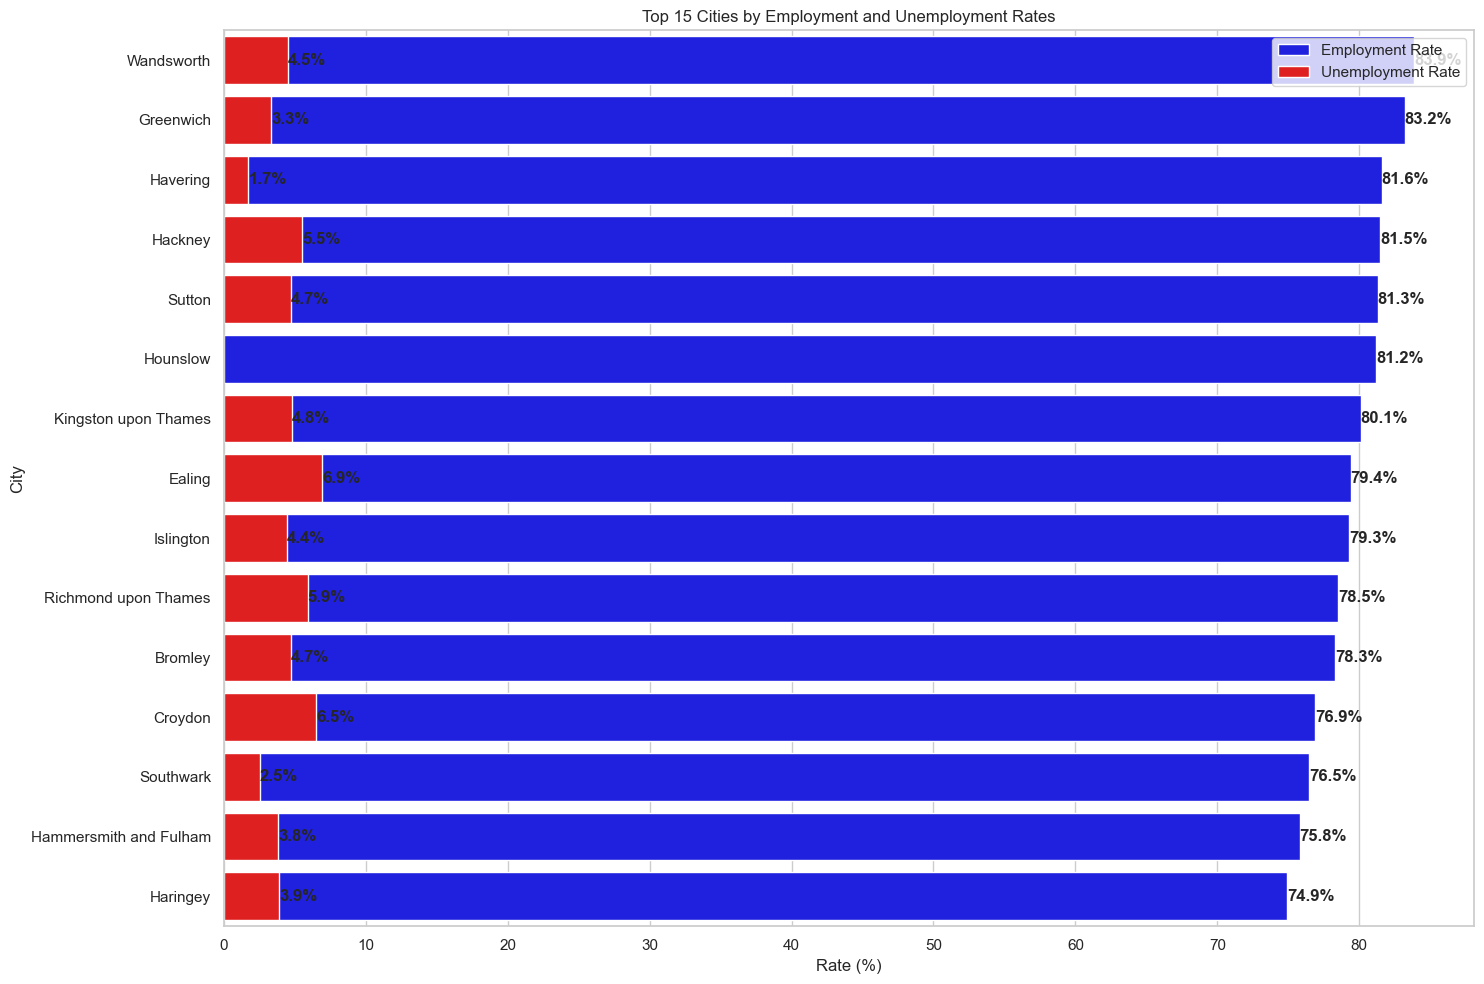

                      City  Employment Rate (2023) %  \
30              Wandsworth                      83.9   
9                Greenwich                      83.2   
14                Havering                      81.6   
10                 Hackney                      81.5   
27                  Sutton                      81.3   
16                Hounslow                      81.2   
19    Kingston upon Thames                      80.1   
7                   Ealing                      79.4   
17               Islington                      79.3   
25    Richmond upon Thames                      78.5   
4                  Bromley                      78.3   
6                  Croydon                      76.9   
26               Southwark                      76.5   
11  Hammersmith and Fulham                      75.8   
12                Haringey                      74.9   

    Unemployment Rate (2023) %  
30                         4.5  
9                          3.3  
14  

In [15]:
# Check the data types of the relevant columns
print(df[['Employment Rate (2023) %', 'Unemployment Rate (2023) %']].dtypes)

# Convert the columns to numeric, forcing errors to NaN if any
for col in ['Employment Rate (2023) %', 'Unemployment Rate (2023) %']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-attempt the grouping and plotting
city_data = df.groupby('City')[['Employment Rate (2023) %', 'Unemployment Rate (2023) %']].mean().reset_index()

# Sort the data by employment rate in descending order
city_data = city_data.sort_values('Employment Rate (2023) %', ascending=False)

# Select top 15 cities for better visibility
top_15_cities = city_data.head(15)

# Create the plot
plt.figure(figsize=(15, 10))

# Plot employment rate
sns.barplot(x='Employment Rate (2023) %', y='City', data=top_15_cities, color='blue', label='Employment Rate')

# Plot unemployment rate
sns.barplot(x='Unemployment Rate (2023) %', y='City', data=top_15_cities, color='red', label='Unemployment Rate')

plt.title('Top 15 Cities by Employment and Unemployment Rates')
plt.xlabel('Rate (%)')
plt.ylabel('City')
plt.legend()

# Add value labels on the bars
for i, v in enumerate(top_15_cities['Employment Rate (2023) %']):
    plt.text(v, i, f'{v:.1f}%', va='center', fontweight='bold')
for i, v in enumerate(top_15_cities['Unemployment Rate (2023) %']):
    plt.text(v, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Display the data for these cities
print(top_15_cities)

The plot above provides insights into the employment and unemployment rates across different cities.
Employment Rate: : Cities with higher employment rates, such as Wandsworth and Greenwich, may have more robust local economies and job opportunities. This can lead to better living standards and lower crime rates.

Unemployment Rate: Cities with higher unemployment rates, like Ealing and Croydon, might face economic challenges, which can lead to social issues such as increased crime or poverty.

Policy Implications: Policymakers can use this information to target economic development initiatives, job creation programs, and social services in cities with higher unemployment rates to improve overall economic health.

C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_148512\2828695956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=2023, y='City', data=top_15_cities, palette='viridis')


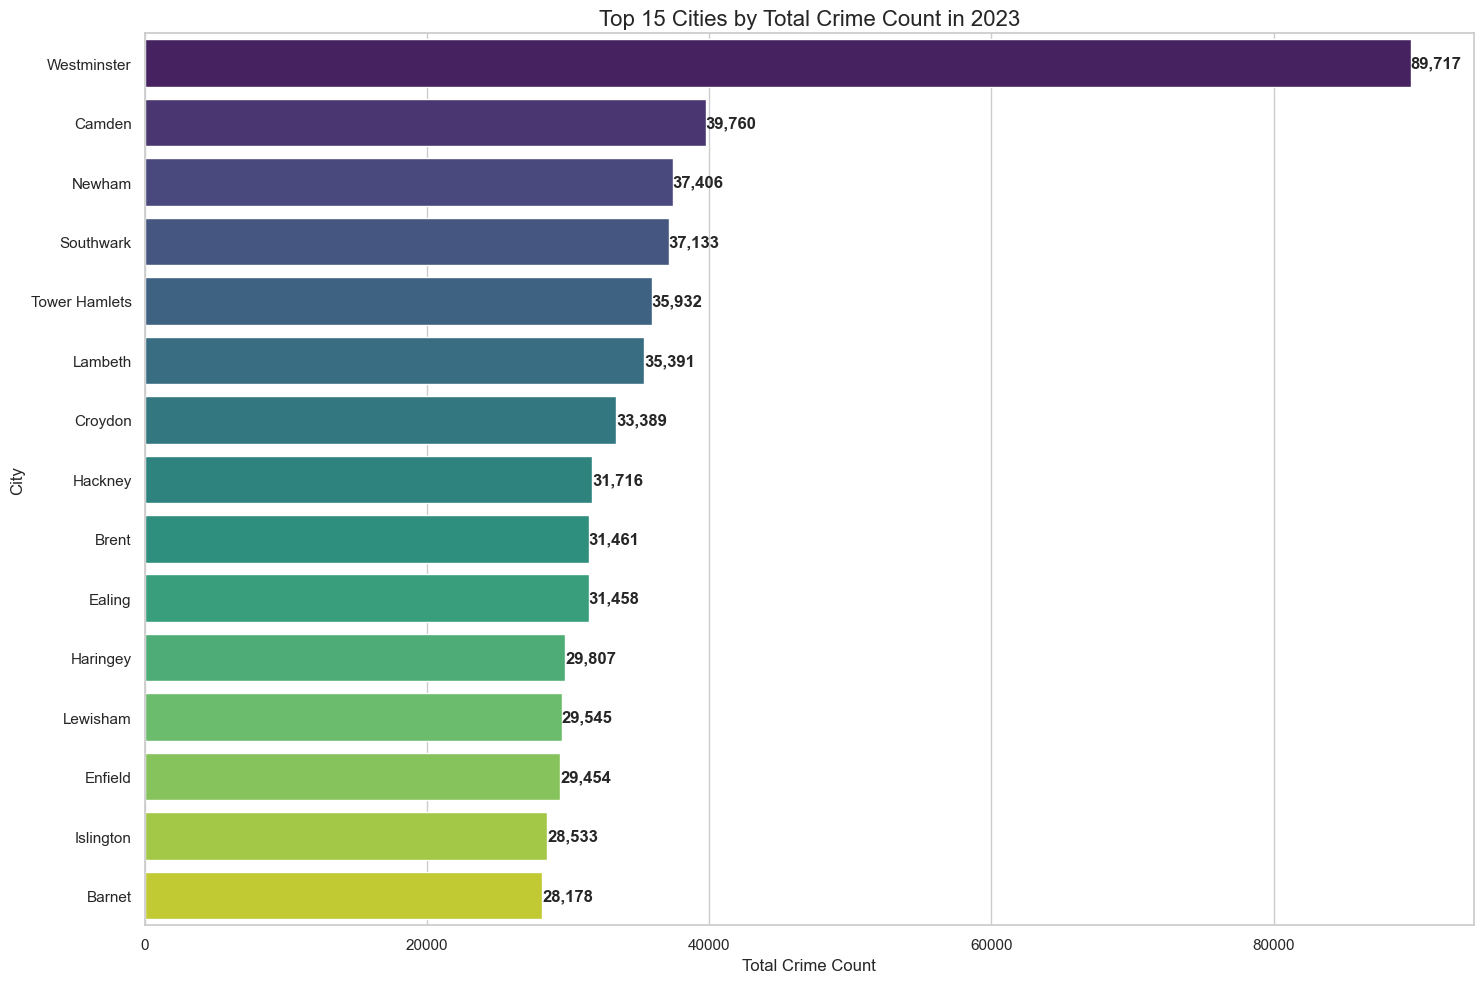

             City   2023
0     Westminster  89717
1          Camden  39760
2          Newham  37406
3       Southwark  37133
4   Tower Hamlets  35932
5         Lambeth  35391
6         Croydon  33389
7         Hackney  31716
8           Brent  31461
9          Ealing  31458
10       Haringey  29807
11       Lewisham  29545
12        Enfield  29454
13      Islington  28533
14         Barnet  28178
Total crimes across all cities: 895,022
Average crimes per city: 27,969
Median crimes per city: 27,527


In [34]:
# Group the data by City and sum the crime counts for 2023
crime_by_city = df.groupby('City')[2023].sum().sort_values(ascending=False).reset_index()

# Select top 15 cities for better visibility
top_15_cities = crime_by_city.head(15)

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(x=2023, y='City', data=top_15_cities, palette='viridis')

plt.title('Top 15 Cities by Total Crime Count in 2023', fontsize=16)
plt.xlabel('Total Crime Count', fontsize=12)
plt.ylabel('City', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(top_15_cities[2023]):
    plt.text(v, i, f'{v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Display the data for these cities
print(top_15_cities)

# Calculate some statistics
total_crimes = crime_by_city[2023].sum()
average_crimes_per_city = crime_by_city[2023].mean()
median_crimes = crime_by_city[2023].median()

print(f"\
Total crimes across all cities: {total_crimes:,.0f}")
print(f"Average crimes per city: {average_crimes_per_city:,.0f}")
print(f"Median crimes per city: {median_crimes:,.0f}")

This plot above provides insights into the distribution of crime across the top 15 cities in the dataset for the year 2023.

CRIME DISTRIBUTION:

Westminster stands out significantly with the highest crime count (89,717), nearly double that of the second-highest city, Camden (39,760).
It is also noticed that there is a gradual decrease in crime counts from the top to the bottom of the list, with Barnet having the lowest count among the top 15 at 28,178.


URBAN CENTERS AND CRIME:

The cities with the highest crime counts (Westminster, Camden, Newham, Southwark) are all located in or near central London. This could be due to several factors like Higher population density, More tourist activity, Greater concentration of businesses and Potentially more accurate or comprehensive reporting of crimes

CRIME PREVENTION

Cities lower on the list, like Barnet and Islington, might have effective crime prevention strategies that could be studied and potentially applied to higher-crime areas.
Economic Impact:


Normally, high crime rates can affect local economies by deterring businesses and tourists. However, Westminster, despite having the highest crime count, is a major tourist and has a high employement rate as seen in the previous plot, suggesting that other factors (like economic opportunities or historical significance) may outweigh the crime issue.


GENERAL OVERVIEW

The total number of crimes across all cities is substantial, indicating a significant challenge for law enforcement and society.
The average crimes per city (27,969) is close to the median (27,527), suggesting a relatively even distribution of crime across cities, with some notable outliers like Westminster.
The fact that Westminster has more than three times the average number of crimes underscores its unique position in the dataset.


C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_148512\1779718591.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=2023, y='CRIME', data=top_10_crimes, palette='viridis')


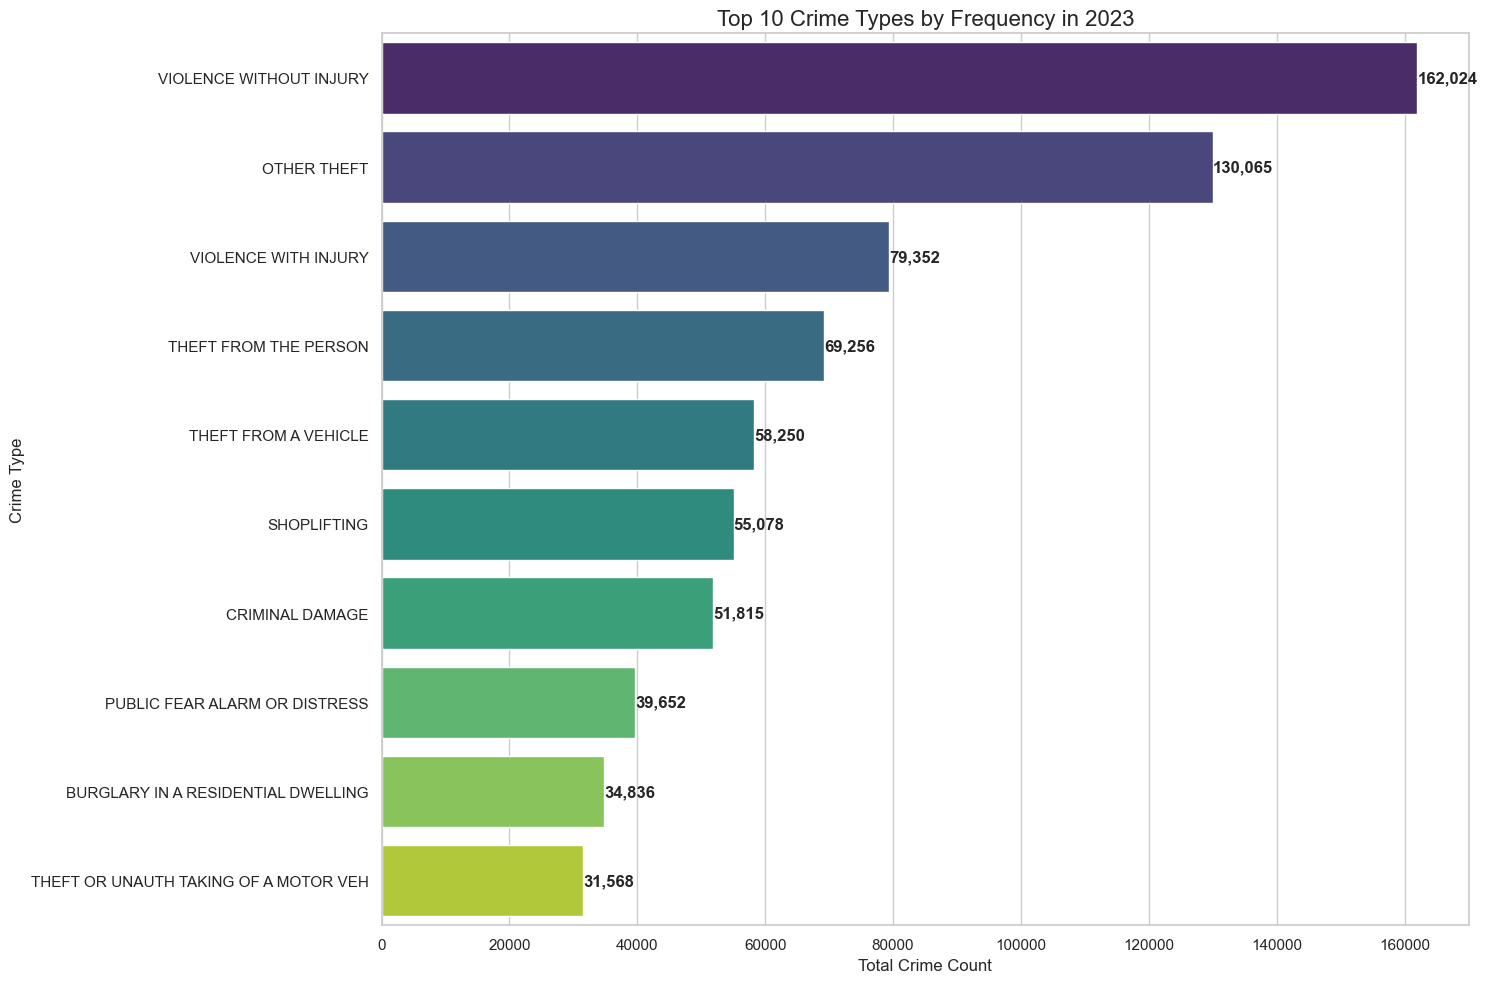

                                   CRIME    2023
0                VIOLENCE WITHOUT INJURY  162024
1                            OTHER THEFT  130065
2                   VIOLENCE WITH INJURY   79352
3                  THEFT FROM THE PERSON   69256
4                   THEFT FROM A VEHICLE   58250
5                            SHOPLIFTING   55078
6                        CRIMINAL DAMAGE   51815
7          PUBLIC FEAR ALARM OR DISTRESS   39652
8     BURGLARY IN A RESIDENTIAL DWELLING   34836
9  THEFT OR UNAUTH TAKING OF A MOTOR VEH   31568
Total crimes across all types: 895,022
Percentage of crimes represented by top 10 types: 79.54%
Percentage breakdown of top 10 crime types:
                                CRIME  Percentage
              VIOLENCE WITHOUT INJURY   18.102795
                          OTHER THEFT   14.532045
                 VIOLENCE WITH INJURY    8.865927
                THEFT FROM THE PERSON    7.737910
                 THEFT FROM A VEHICLE    6.508220
                     

C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_148512\1779718591.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_crimes['Percentage'] = (top_10_crimes[2023] / total_crimes) * 100


In [43]:
# Group the data by Crime type and sum the crime counts for 2023
crime_by_type = df.groupby('CRIME')[2023].sum().sort_values(ascending=False).reset_index()

# Select top 10 crime types for better visibility
top_10_crimes = crime_by_type.head(10)

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(x=2023, y='CRIME', data=top_10_crimes, palette='viridis')

plt.title('Top 10 Crime Types by Frequency in 2023', fontsize=16)
plt.xlabel('Total Crime Count', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(top_10_crimes[2023]):
    plt.text(v, i, f'{v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Display the data for these crime types
print(top_10_crimes)

# Calculate some statistics
total_crimes = crime_by_type[2023].sum()
percentage_top_10 = (top_10_crimes[2023].sum() / total_crimes) * 100

print(f"\
Total crimes across all types: {total_crimes:,.0f}")
print(f"Percentage of crimes represented by top 10 types: {percentage_top_10:.2f}%")

# Calculate percentage for each crime type
top_10_crimes['Percentage'] = (top_10_crimes[2023] / total_crimes) * 100
print("\
Percentage breakdown of top 10 crime types:")
print(top_10_crimes[['CRIME', 'Percentage']].to_string(index=False))

The above plot provides valuable insights into the most common types of crimes London in 2023.

The top three most frequent crime types are:
“Violence Without Injury” with 162,024 incidents
“Other Theft” with  130,065 incidents
“Violence With Injury” with 79,352 incidents

VIOLENCE-RELATED CRIMES:

Violence (both with and without injury) accounts for a significant portion of crimes. This suggests a need for conflict resolution programs and increased focus on preventing violent behaviour.

THEFT-RELATED CRIMES:

Various forms of theft (Other Theft, Theft from the Person, Theft from a Vehicle, Shoplifting and Burglary in residential dwelling) proved to be most significant overall crime category. They feature prominently in the top 10 and collectively account for about 34.93% of all crimes. This indicates a need for improved security measures and public awareness campaigns about protecting personal property.

PUBLIC ORDER & CRIMINAL DAMAGE

"Public Fear, Alarm or Distress" and “criminal damage” presence in the top 10 shows how significant they are. They indicate issues with public behaviour and vandalism or property destruction respectively which can affect the quality of life in communities.

KEY OBSERVATIONS:

The top 10 crime types account for 79.54% of all reported crimes, indicating that focusing on these areas could significantly impact overall crime rates.
Violence Without Injury is the most common crime type, representing 18.10% of all crimes. This category likely includes threats, attempted assaults, and domestic incidents without physical harm.


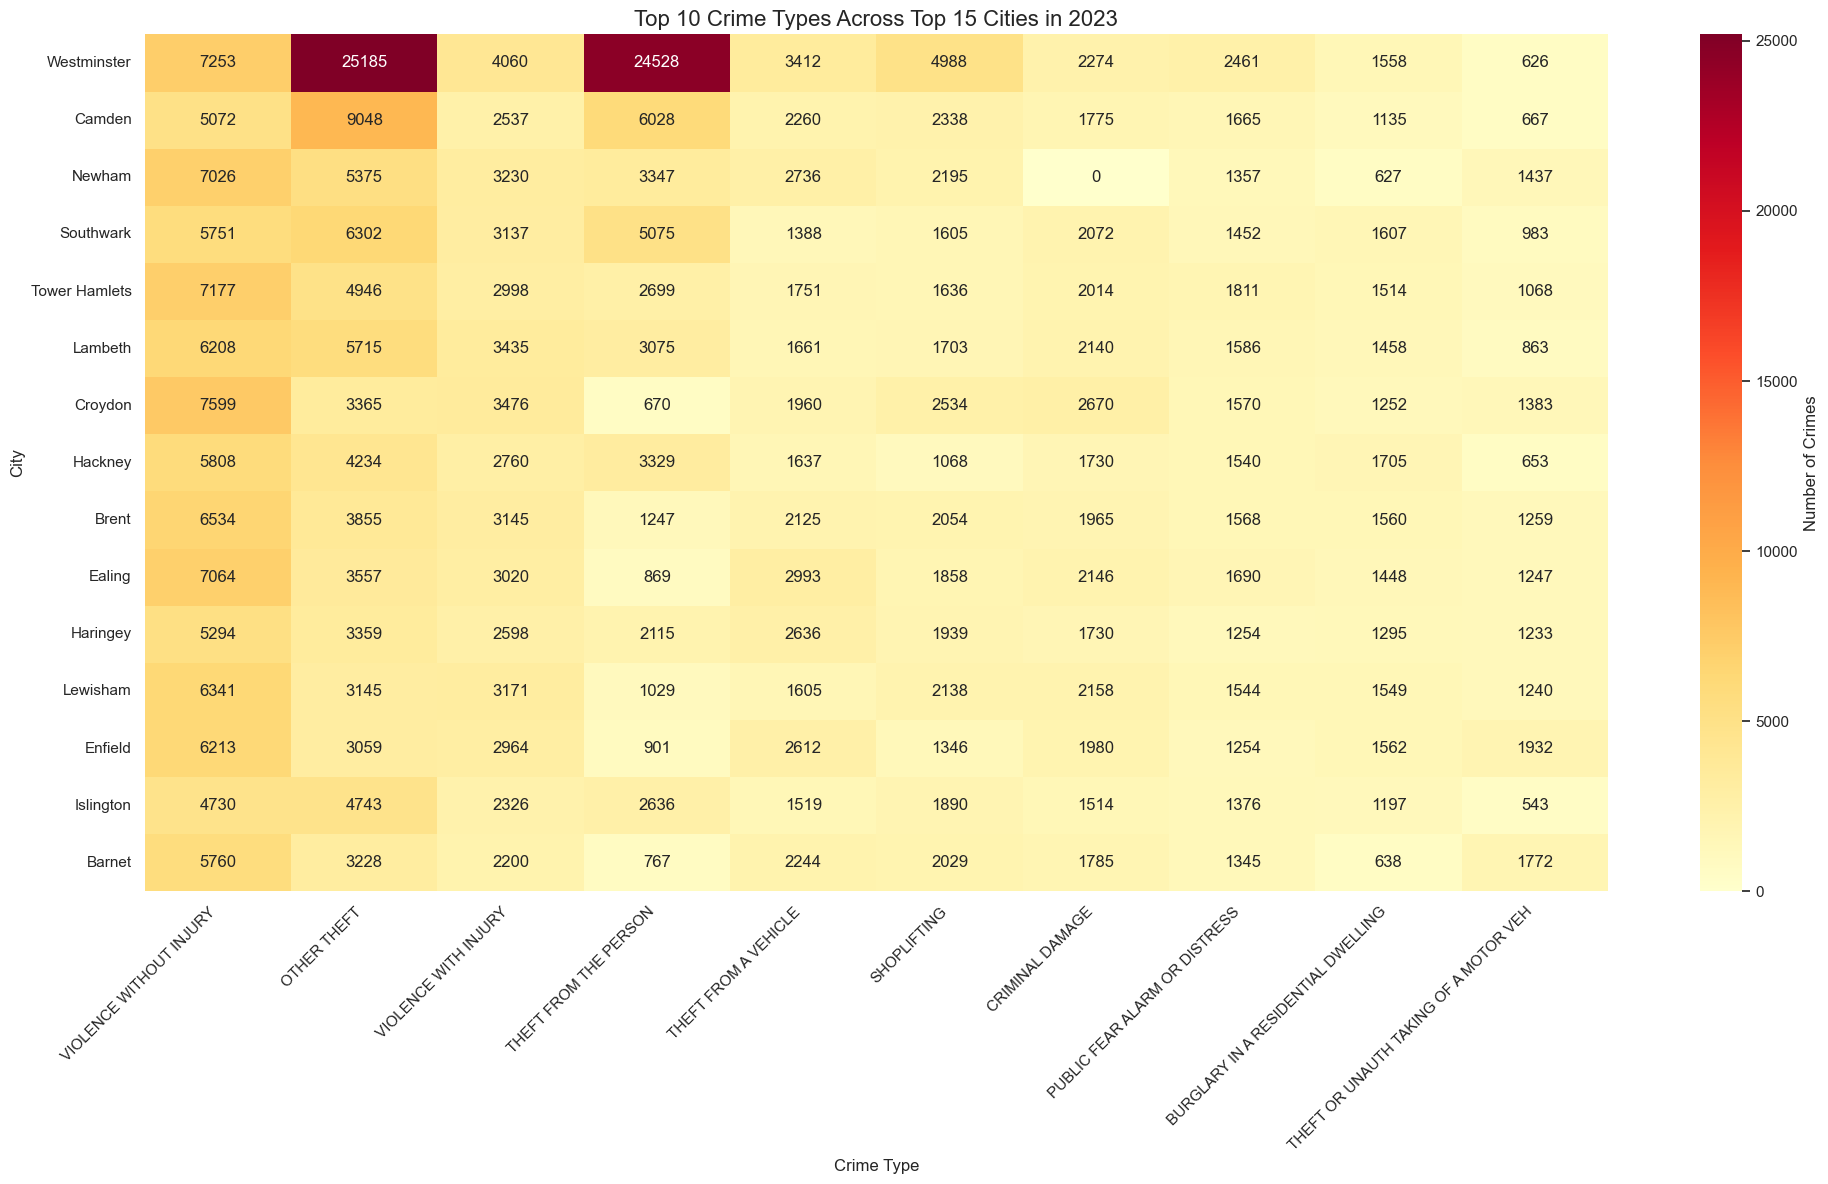

In [50]:
# Group the data by City and Crime type, summing the crime counts for 2023
crime_by_city_type = df.groupby(['City', 'CRIME'])[2023].sum().unstack()

# Sort cities by total crime count
city_totals = crime_by_city_type.sum(axis=1).sort_values(ascending=False)
crime_by_city_type = crime_by_city_type.loc[city_totals.index]

# Select top 15 cities and top 10 crime types
top_15_cities = city_totals.head(15).index
top_10_crimes = crime_by_city_type.sum().sort_values(ascending=False).head(10).index
crime_data = crime_by_city_type.loc[top_15_cities, top_10_crimes]

# Create a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(crime_data, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Number of Crimes'})

plt.title('Top 10 Crime Types Across Top 15 Cities in 2023', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the Heatmap above

Westminster stands out with significantly higher crime numbers across most categories, especially in "Other Theft" and "Theft from the Person". This could be due to its central location, high tourist traffic, and concentration of businesses.

Other cities show more varied patterns, with some crimes being more pominentt in certain area but not entirely severes.

In [56]:
# Display the data
crime_data.head(15)

CRIME,VIOLENCE WITHOUT INJURY,OTHER THEFT,VIOLENCE WITH INJURY,THEFT FROM THE PERSON,THEFT FROM A VEHICLE,SHOPLIFTING,CRIMINAL DAMAGE,PUBLIC FEAR ALARM OR DISTRESS,BURGLARY IN A RESIDENTIAL DWELLING,THEFT OR UNAUTH TAKING OF A MOTOR VEH
City,,,,,,,,,,
Westminster,7253.0,25185.0,4060.0,24528.0,3412.0,4988.0,2274.0,2461.0,1558.0,626.0
Camden,5072.0,9048.0,2537.0,6028.0,2260.0,2338.0,1775.0,1665.0,1135.0,667.0
Newham,7026.0,5375.0,3230.0,3347.0,2736.0,2195.0,0.0,1357.0,627.0,1437.0
Southwark,5751.0,6302.0,3137.0,5075.0,1388.0,1605.0,2072.0,1452.0,1607.0,983.0
Tower Hamlets,7177.0,4946.0,2998.0,2699.0,1751.0,1636.0,2014.0,1811.0,1514.0,1068.0
Lambeth,6208.0,5715.0,3435.0,3075.0,1661.0,1703.0,2140.0,1586.0,1458.0,863.0
Croydon,7599.0,3365.0,3476.0,670.0,1960.0,2534.0,2670.0,1570.0,1252.0,1383.0
Hackney,5808.0,4234.0,2760.0,3329.0,1637.0,1068.0,1730.0,1540.0,1705.0,653.0
Brent,6534.0,3855.0,3145.0,1247.0,2125.0,2054.0,1965.0,1568.0,1560.0,1259.0


In [58]:
# Calculate percentage of each crime type for each city
crime_percentages = crime_data.div(crime_data.sum(axis=1), axis=0) * 100

# Find the most prevalent crime type for each city
most_prevalent_crimes = crime_percentages.idxmax(axis=1)
print("\
Most prevalent crime type for each city:")
print(most_prevalent_crimes)

Most prevalent crime type for each city:
City
Westminster                  OTHER THEFT
Camden                       OTHER THEFT
Newham           VIOLENCE WITHOUT INJURY
Southwark                    OTHER THEFT
Tower Hamlets    VIOLENCE WITHOUT INJURY
Lambeth          VIOLENCE WITHOUT INJURY
Croydon          VIOLENCE WITHOUT INJURY
Hackney          VIOLENCE WITHOUT INJURY
Brent            VIOLENCE WITHOUT INJURY
Ealing           VIOLENCE WITHOUT INJURY
Haringey         VIOLENCE WITHOUT INJURY
Lewisham         VIOLENCE WITHOUT INJURY
Enfield          VIOLENCE WITHOUT INJURY
Islington                    OTHER THEFT
Barnet           VIOLENCE WITHOUT INJURY
dtype: object


"Violence Without Injury" is the most prevalent crime in 11 out of 15 cities, indicating a widespread issue with non-physical violent confrontations.

"Other Theft" is the most common in Westminster, Camden, Southwark, and Islington, suggesting these areas might have higher rates of pickpocketing or shoplifting.

CITY-SPECIFIC PATTERNSs:

Westminster has exceptionally high numbers in "Other Theft" and "Theft from the Person", likely due to its status as a major tourist and shopping destinat
ion.
Croydon shows higher numbers in "Violence Without Injury" and "Criminal Damage", possibly indicating issues with public order and property c
rime.
Newham has a notably high number of "Theft or Unauthorized Taking of a Motor Vehicle" cases compared to other cities.

In [65]:
# Calculate total crimes for each city
city_totals = crime_data.sum(axis=1).sort_values(ascending=False)
print("\
Total crimes for each city:")
print(city_totals)

# Calculate the percentage of total crimes each city accounts for
city_percentages = (city_totals / city_totals.sum()) * 100
print("\
Percentage of total crimes for each city:")
print(city_percentages)

Total crimes for each city:
City
Westminster      76345.0
Camden           32525.0
Southwark        29372.0
Lambeth          27844.0
Tower Hamlets    27614.0
Newham           27330.0
Croydon          26479.0
Ealing           25892.0
Brent            25312.0
Hackney          24464.0
Lewisham         23920.0
Enfield          23823.0
Haringey         23453.0
Islington        22474.0
Barnet           21768.0
dtype: float64
Percentage of total crimes for each city:
City
Westminster      17.405925
Camden            7.415387
Southwark         6.696533
Lambeth           6.348164
Tower Hamlets     6.295726
Newham            6.230977
Croydon           6.036957
Ealing            5.903127
Brent             5.770892
Hackney           5.577557
Lewisham          5.453530
Enfield           5.431415
Haringey          5.347058
Islington         5.123856
Barnet            4.962895
dtype: float64


Westminster accounts for 17.41% of all crimes in these top 15 cities, more than double the next highest city.


The top 5 cities (Westminster, Camden, Southwark, Lambeth, and Tower Hamlets) account for about 44% of all crimes in this dataset
